# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Описание данных

`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)<br>
`balcony` — число балконов<br>
`ceiling_height` — высота потолков (м)<br>
`cityCenters_nearest` — расстояние до центра города (м)<br>
`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)<br>
`first_day_exposition` — дата публикации<br>
`floor` — этаж<br>
`floors_total` — всего этажей в доме<br>
`is_apartment` — апартаменты (булев тип)<br>
`kitchen_area` — площадь кухни в квадратных метрах (м²)<br>
`last_price` — цена на момент снятия с публикации<br>
`living_area` — жилая площадь в квадратных метрах (м²)<br>
`locality_name` — название населённого пункта<br>
`open_plan` — свободная планировка (булев тип)<br>
`parks_around3000` — число парков в радиусе 3 км<br>
`parks_nearest` — расстояние до ближайшего парка (м)<br>
`ponds_around3000` — число водоёмов в радиусе 3 км<br>
`ponds_nearest` — расстояние до ближайшего водоёма (м)<br>
`rooms` — число комнат<br>
`studio` — квартира-студия (булев тип)<br>
`total_area` — общая площадь квартиры в квадратных метрах (м²)<br>
`total_images` — число фотографий квартиры в объявлении<br>

### План работы

1. Изучить общую информацию
2. Предобработка данных
    1. Найдити и изучить пропущенные значения в столбцах
    2. Рассмотреть типы данных в столбцах
    3. Обработать явные/неявные дубликаты
3. Добавить в таблицу новые столбцы с параметрами:
    1. Цена одного квадратного метра
    2. День недели публикации объявления
    3. Месяц недели публикации объявления
    4. Год недели публикации объявления
4. Провести исследовательский анализ данных
    1. Изучить количественные параметры
    2. Изучить, как быстро продавались квартиры
    3. Изучить, какие факторы больше всего влияют на общую стоимость объекта
    4. Изучить среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
    5. Вычислить среднюю цену каждого километра в Санкт-Петербурге
5. Общий вывод

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import os

In [2]:
pth1 = 'real_estate_data.csv'
pth2 = '/datasets/real_estate_data.csv'

if os.path.exists(pth1):
    data = pd.read_csv(pth1)
elif os.path.exists(pth2):
    data = pd.read_csv(pth2)
else:
    print('Something is wrong')

pd.set_option('display.max_columns', None)

#### Посмотрим на первые строки нашего датафрейма

In [3]:
data.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


Видим, что в датасете нестандартный разделитель `\t`. Изменим его

In [4]:
# При вызове метода read_csv изменим значение параматра sep
try:
    data = pd.read_csv('real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv',  sep='\t')
                       
# Сразу выведем на экран наш обновленный датасет
data.head(10)             

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


#### Посмотрим на общую информацию о датафрейме

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

1. Видим, что всего в датасете 23699 строк
2. Из 22 столбцов, в 14 имеются пропуски.
3. В некотором столбцах имеется некорректный тип данных.

#### Построим гистограмму для всех числовых значений датафрейма

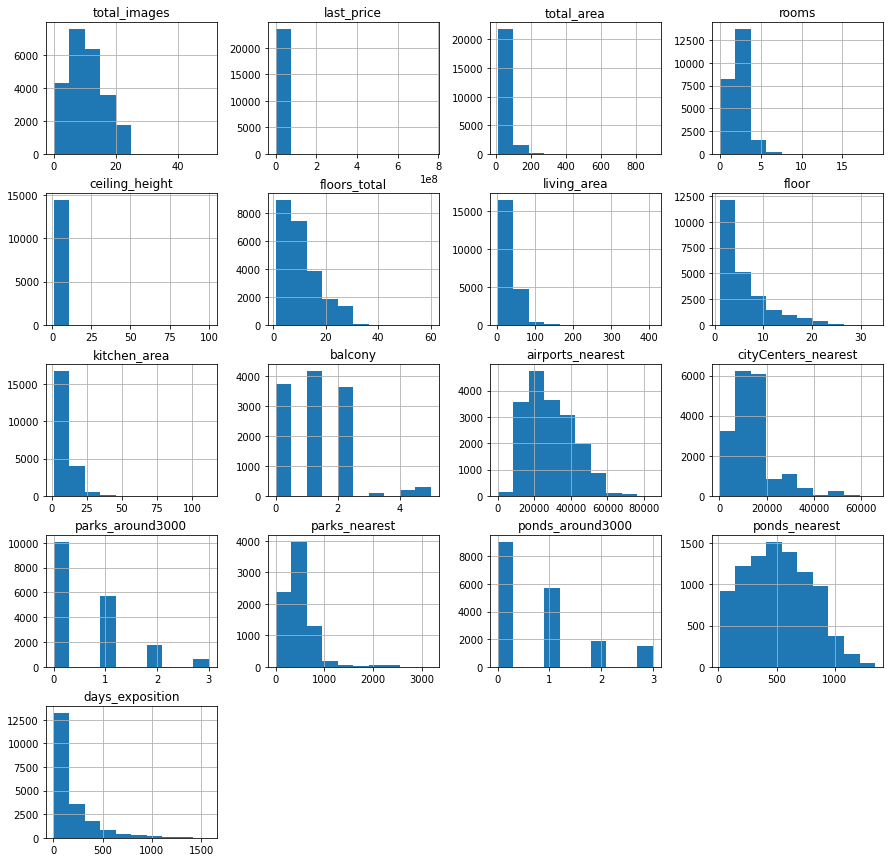

In [6]:
data.hist(figsize=(15, 15))
None

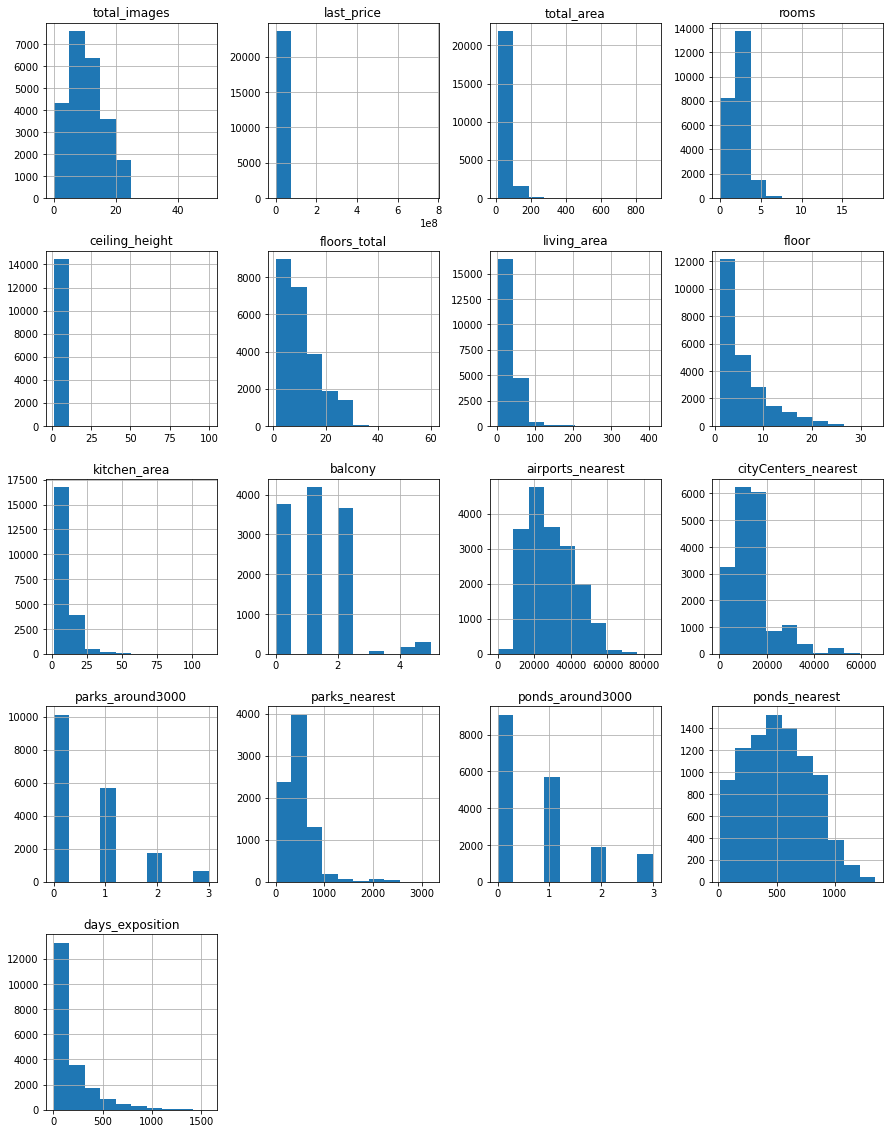

In [7]:
# Код ревьюера

data.hist(figsize=(15, 20))
None

#### Вывод:
1. В данных есть проспуски, также некоторые столбцы имеют некорректный тип данных. Их необходимо обработать
2. Гистограммы на первом этапе дают первоначальное представление о расперделении данных в числовых столбцах. Глядя на некоторые из них закрадыаются вопросы о выбросах. С ними разберемся на следующих этапах

### Предобработка данных

#### Найти и определить пропущенные значения в столбцах

Определим, в каких столбцах имеются пропущенные значения

In [8]:
column_null = data.isna().sum()
column_null

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Для нагляности построим гистограмму количества пропущенных значений по столбцам

<AxesSubplot:>

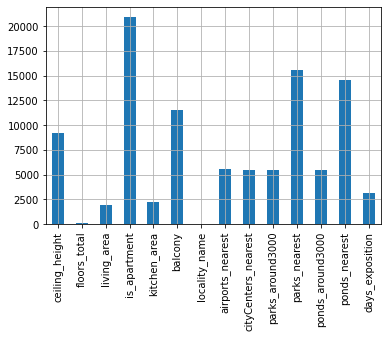

In [9]:
column_null[column_null != 0].plot(kind='bar', grid=True)

Оценим в проценты пропущенных значений в столбцах

In [10]:
count = 0
print('Пропуски в столбцах в процентах:')
for i in column_null[column_null != 0]:
    print(column_null[column_null != 0].index[count], '=', end=' ')
    print(round(100 / (len(data) / i), 2), '%', sep='')
    count += 1

Пропуски в столбцах в процентах:
ceiling_height = 38.8%
floors_total = 0.36%
living_area = 8.03%
is_apartment = 88.29%
kitchen_area = 9.61%
balcony = 48.61%
locality_name = 0.21%
airports_nearest = 23.38%
cityCenters_nearest = 23.29%
parks_around3000 = 23.28%
parks_nearest = 65.91%
ponds_around3000 = 23.28%
ponds_nearest = 61.56%
days_exposition = 13.42%


##### `is_apartment`
Видно, что наибольшее число пропусков в столбце `is_apartment`. Почти 21000 пропусков, это около 88% от всего числа значений. Данный столбец указывает на то, является ли квартира "апартаментами".

In [11]:
# Посмотрим, какие вообще значения принимает столбец `is_apartment`
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

Этот столбцец принимает только 2 значения. True - является апартаментами и False - не является.<br>
С большой долей уверенности можно сказать, что пропущенные значения в этом столбце должны были быть False, т.е. квартира не является апартаментами. Так как данный вид жилья в стране появился довольно недавно и пока не так распространен, вполне реально, что большая часть жилья не является апартаментами

In [12]:
# Заменим значения nan на False
data['is_apartment'] = data['is_apartment'].fillna(False)

# Сразу проверим количество пропусков в столбце
data['is_apartment'].isna().sum()

0

В столбце `is_apartment` пропуски успешно обработаны. Пропуски заменены на False

##### `ponds_nearest` , `parks_nearest` и `ponds_around3000` , `parks_around3000`
Далее по списку столбцы `ponds_nearest` и `parks_nearest`. Данные столбцы хранят информацию о расстоянии до ближайшего пруда и парка соответственно.<br>
В датафрейме также есть столбцы, которые характеризуют наличие пруда и парка в радиусе 3км. `ponds_around3000` и `parks_around3000`. Можно предположить, что при отсутсвии пруда или парка в радиусе 3км, информации о ближайших прудах и парках не будет.<br>
Проверим гипотезу

Напишем функцию, которая проверяет: Везде ли, где в столбцах `ponds_nearest` и `parks_nearest` пропуски совпадают с пропусками или нулевыми значениями в столбцах `ponds_around3000` и `parks_around3000`<br>
Функция вернет True, если совпадет. И False, если нет

In [13]:
# Проверим: Сначала заменим все пропуски в столбцах around на 0.0.
# Отфильтруем датафрейм, где строки в столбце around со значением 0.0 
# равны нулевым значениям в столбце nearest.
# Отфильтруем еще раз датафрейм где строки в столбце around со значением 0.0
# Если индексы первого фильтра совпадают с индексами второго, то
# это значит, что гипотеза верна и все пустые значения столбца nearest означают, что
# в радиусе 3км нет озёр/парков

def nearest_around_check(around, nearest):
    # Проверяем, что количество значений больше 0 в нашем датасете = количество ненулевых значений столбца
    if (len(data[data[nearest] > 0])) == (len(data[nearest]) - data[nearest].isna().sum()):
        # Меняем все пропуски столбца around на 0.0
        data[around] = data[around].fillna(0.0)
        # Если значения 0.0 столбца around = пустым значениям nearest, то возвращаем True
        filtered_data1 = data[(data[around] == 0.0) & (data[nearest].isna())]
        filtered_data2 = data[data[around] == 0.0]
        if filtered_data1.index.to_list() == filtered_data2.index.to_list():
            return True
        else:
            return False
print(nearest_around_check('ponds_around3000', 'ponds_nearest'))
print(nearest_around_check('parks_around3000', 'parks_nearest'))

True
False


Результат неоднозначный: `parks_around3000`, `parks_nearest` не подтверждает гипотезу. Посмотрим, что не так

In [14]:
# Найдем в каких индексах есть несовпадения
print(data[(data['parks_around3000'] == 0.0) & ~(data['parks_nearest'].isna())].index)

Int64Index([1590, 10959, 19208, 19430], dtype='int64')


In [15]:
# Посмотрим на эти строки
print(data.loc[[1590, 10959, 19208, 19430],['parks_around3000', 'parks_nearest']])

       parks_around3000  parks_nearest
1590                0.0         3064.0
10959               0.0         3190.0
19208               0.0         3013.0
19430               0.0         3190.0


Хоть мы и получили несовпадение при проверке гипотезы, всё равно можно сказазать, что она верна.<br>
Так как эти 4 значения выходят за переделы 3км.<br>

Обработали пропуски в столбцах `parks_around3000` и `ponds_around3000` и заменили их на 0 значения. Так как выяснили, что пустые значения характеризуют отсутствие парков и прудов в радиусе 3км и в столбце уже есть 0 значения, которые как раз характиризуют отсутвие парков и прудов.<br>
Пропуски в столбцах `parks_nearest` и `ponds_nearest` трогать не стали. Так как в этих столбах нет других значений, которые могли бы также характиризовать отсутвие ближайшего парка или пруда. Пусть пропуски характеризуют отсутсвие вблизи парков и прудов. 

##### `balcony`

Перейдем к столбцу `balcony`

In [16]:
# Проверим, какие имеются значения в столбце balcony
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

Предположим, что в пустые значения, означают, что балконов в квартире нет. Это логично, так как значения были добавлены пользователем и он мог просто пропустить при размещении объявления

In [17]:
# Заменим значения
data['balcony'] = data['balcony'].fillna(0.0)

# Проверим пустые значения в столбце
data['balcony'].isna().sum()

0

В столбце `balcony` заменили пропуски на 0 значения. Так как скорее всего они характеризуют отсутсвие балкона

##### `ceiling_height`

Далее по кол-ву пустых значений столбце `ceiling_height`. Данный столбец характеризует высоту потолков в доме.<br>
Было бы логично заменить их на средние значения в столбце, так как во всех квартирах вряд ли можно найти потолки более 3м

In [18]:
# Проверим среднее и медиану
print(data['ceiling_height'].mean())
print(data['ceiling_height'].median())

2.77149889685604
2.65


Хоть медиана и среднее не сильно отличаются, но на гистограмме столбца `ceiling_height` мы видели значения в 100м. Это явно аномальное значение, лучше использовать медиану

In [19]:
# Заменим пустые значения на медиану
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

# Проверим пустые значения в столбце
data['ceiling_height'].isna().sum()

0

Проверим, где остались нулевые значения

In [20]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропуски в столбце  `ceiling_height` заменены на медианное значение потолков

##### `airports_nearest` и `cityCenters_nearest`

На текущий момент больше всего пропусков осталось в столбце `airports_nearest` и `cityCenters_nearest`<br>
Так как это картографические данные, можно предположить, что в населенных пунктах нет центра или аэропорта. Или расстояние до них очень большое. Корректно заполнить пропуски в данных столбцах не получится, поэтому оставим как есть

##### `days_exposition`

В столбце `days_exposition` могут имется пропуски, так как объявление на момент сбора данных еще не снято с публикации. Пропуски в этом столбце трогать не будем, так как то, что объявление еще не снято, может являться важной характеристикой

##### `living_area` и `kitchen_area`

Посмотрим на пропуски в столбцах `living_area` и `kitchen_area`. Пропуски могли появиться из-за человеческого фактора. Например владельцам было лень считать площадь отдельных комнат.<br>
Можно посчитать какой процент в среднем от всей площади составляет "жилая площадь" и "площадь кухни". Для подсчета среднего лучше взять медиану

In [21]:
living_part = (data['living_area'] * 100) / data['total_area']
living_part = int(living_part.median())
living_part

56

In [22]:
kitchen_part = (data['kitchen_area'] * 100) / data['total_area']
kitchen_part = int(kitchen_part.median())
kitchen_part

17

Таким образом мы вычислили, что жилая площадь в среднем составляет 56% от общей, а площадь кухни 17%. Теперь заменим пропуски в столбцах

In [23]:
data['living_area'] = data['living_area'].fillna(data['total_area'] * (living_part / 100))
data['living_area'].isna().sum()

0

In [24]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * (kitchen_part / 100))
data['kitchen_area'].isna().sum()

0

Пропуски в столбцах `living_area` и `kitchen_area` заменены на медианные значения в зависмости от размера всей площади квартиры

##### `floors_total`

Пропуски в столбце `floors_total` могли появится также из-за человеческого фактора. При размещении объявления пользователь не сочел необходимым указывать данную информацию. Пропуски в этом столбце можно оставить. Так как они состовляют очень маленькую часть от всего количества значений

##### `locality_name`

Природу появления пропусков в столбце `locality_name` указать довольно сложно. Название населенного пункта может играть большую роль в результатах исследования. Соответсвенно без значений этого столбца теряется большая смысловая его часть. В таком случае будет правильно удалить строки, содежащие пропуски в данном столбце

In [25]:
data = data.dropna(subset=['locality_name']).reset_index(drop=True)

In [26]:
# Проверим наличие пропусков в солбцах
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               85
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000            0
parks_nearest           15586
ponds_around3000            0
ponds_nearest           14565
days_exposition          3180
dtype: int64

<b>Вывод:</b>
1. Пропуски были обработаны в следующих столбцах:<br>
    1.1. В `is_apartment` пропуски заменены на False.<br>
    1.2. В `ponds_around3000` и `parks_around3000` пропуски заменены на 0.<br>
    1.3. В `ponds_nearest` и `parks_nearest` пропуски оставлены, как есть.<br>
    1.4. В `balcony` пропуски заменены на 0 значения.<br>
    1.5. В `ceiling_height` пропуски заменены на медианное значение потолков.<br>
    1.6. В `airports_nearest` и `cityCenters_nearest` пропуски оставлены, как есть.<br>
    1.7. В `days_exposition` пропуски оствлены, как есть.<br>
    1.8. В `living_area` и `kitchen_area` пропуски заменены на медианные значения в зависмости от размера всей площади квартиры.<br>
    1.9. В `floors_total` пропуски оставлены, как есть.<br>
    1.10. В `locality_name` строки с пропусками удалены

#### Рассмотреть типы данных в каждом столбце:

Еще раз посмотрим на типы данных в каждом столбце

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23650 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  bool   
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          23650 non-null  float64
 13  balcony               23650 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Для наглядности еще раз посмотрим на данные в таблице

In [28]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.60,1,False,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.30,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,89.04,9,False,False,False,27.03,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Некорректный тип данных только в столбце `first_day_exposition`. Изменим его на корректный, так как для работы с датой в pandas имеются удобные методы

In [29]:
# Для этого воспользуемся методом to_datetime()
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M')

# Выведем обновленный столбец
data['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

Теперь в столбце `first_day_exposition` корректный тип данных: datetime64 

Значения в столбцах  `balcony`, `parks_around3000`, `ponds_around3000`, которые характеризуют кол-во балконов, кол-во парков в радиусе 3км, ко-во озер в радиусе 3км и сколько дней было размещено объявление (от публикации до снятия) соответственно, не могут говорить, о том что, в квартире 2.5 балкона или в радиусе 3км имеется 2.5 парка и т.д. Поэтому целеесообразно поменять тип данных в этих столбцах на int

In [30]:
data = data.astype(
        {'balcony': int, 
         'parks_around3000': int, 
         'ponds_around3000': int}, errors='ignore')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

<b>Вывод:</b><br>
Типы данных изменены в столбце `first_day_exposition`, так как для работы с датой значения лучше привести к специальному типу datetime.<br>
Еще типы данных изменены в столбах `balcony`, `parks_around3000`, `ponds_around3000`. Так как по логике значения в них не могут иметь дробный характер. Типы изменены на int

#### Дубликаты

Для начала проверим датафрейм на наличие явных дубликатов

In [31]:
data.duplicated().sum()

0

Отлично, явных дубликатов в датафрейме нет. Проверим наличие неявных дубликатов. Взглянув на первые строки датафрейма можно сказать, что неявные дубликаты могут находится только в столбце `locality_name`, так как только в нем храняться категориальные значения

In [32]:
# Выведем список уникальных значений в столбце locality_name
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Очень много названий с "деревня", "посёлок", "село" и т.д.<br>
Можно сказать, что для понимания названия нам достаточно только названия населенного пункта. (Не обязательно "деревня", "посёлок" и т.д.)<br>
Поэтому создадим столбец, куда передадим только слова, содержащие Большие Буквы. Это и будет названием

In [33]:
def filtered_locality_name(name_list):
    villiage_names = [] # Создадим список - туда передадим названия в виде списков. Получится список списков
    for all_name in name_list: # Пройдемся по столбцу с названиями
        villiage_names.append(all_name.split()) # Передадим в список villiage_names строки с названиями, преобразованные в списки

    filtered_names = [] # Создадим еще один список для отфильтрованных названий
    for name in villiage_names: # Проидемся по нашему списку списков с названиями
        new_list = [] # В список new_list будем класть отфильтрованные значения
        for elem in name: # Пройдемся по списку, состоящего из навзания населенного пункта
            if elem.islower() == False: # Если слово в названии состоит только из строчных букв
                new_list.append(elem) # Удалим его из списка названия
        new_list = ' '.join(new_list) # Преобразуем список в строку
        filtered_names.append(new_list) # Добавим готовое название в список с отфильтрованными названиями
    filtered_names_res = pd.DataFrame({'filtered_locality_name': filtered_names})
    return filtered_names_res
# P.S. Я правда пытался придумать что-то получше, но не получилось

In [34]:
# Добавим его к основному датафрейму в виде столбца
data = data.join(filtered_locality_name(data['locality_name']))

In [35]:
# Выведем первые 10 строк получевшегося датафейма
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,filtered_locality_name
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,Санкт-Петербург
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.600,1,False,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,Шушары
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.300,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,Санкт-Петербург
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,89.040,9,False,False,False,27.03,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,Санкт-Петербург
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,Санкт-Петербург
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.400,5,False,False,False,9.10,0,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,Янино-1
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.600,6,False,False,False,14.40,1,посёлок Парголово,52996.0,19143.0,0,NaN,0,NaN,155.0,Парголово
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,40.096,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN,Санкт-Петербург
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.430,26,False,False,False,8.81,0,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,189.0,Мурино
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.600,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289.0,Санкт-Петербург


Посмотрим на уникальные значения в новом столбце

In [36]:
data['filtered_locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

<b>Вывод:</b><br>
Было решено, что префиксы типа "деревная", "поселок" и т.д. можно удалить, оставив только название

#### Вывод: 
Была проделана работа по предобработке данных. 
1. Обработали пропуски, где это возможно
2. Изменили типы данных, где это необходимо
3. Избавились от неявных дубликатов в столбце `locality_name`

### Посчитайте и добавьте в таблицу новые столбцы

#### Цена одного квадратного метра

Добавим в датафрейм новый столбец, указывающий на цену одного квадратного метра. Назовем его `square_meter_price`.<br>
Поделим стоимость объекта на его общую площадь

In [37]:
# Напишем функцию для расчета цены за квадратный метр
def col_square_meter_price(row):
    price = row['last_price']
    area = row['total_area']
    square_meter_price = price / area
    return round(square_meter_price, 2)

# Применим функцию к датафрейму
data['square_meter_price'] = data.apply(col_square_meter_price, axis=1)

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,filtered_locality_name,square_meter_price
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,Санкт-Петербург,120370.37
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.60,1,False,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,Шушары,82920.79
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,Санкт-Петербург,92785.71
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,89.04,9,False,False,False,27.03,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,Санкт-Петербург,408176.10
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,Санкт-Петербург,100000.00


Столбец добавлися корректно. Можно идти дальше

#### День недели публикации объявления

Добавим день недели публикации объявления (0 — понедельник, 1 — вторник и так далее). Назовем его `week_day_exposition`

In [38]:
# Напишем для добавления дня недели
def col_week_day_exposition(date):
    week_day = pd.DatetimeIndex([date]).weekday
    return week_day[0]

data['week_day_exposition'] = data['first_day_exposition'].apply(col_week_day_exposition)

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,filtered_locality_name,square_meter_price,week_day_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,Санкт-Петербург,120370.37,3
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.60,1,False,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,Шушары,82920.79,1
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,Санкт-Петербург,92785.71,3
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,89.04,9,False,False,False,27.03,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,Санкт-Петербург,408176.10,4
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,Санкт-Петербург,100000.00,1


Столбец с днем недели успешно добавлен

#### Месяц публикации объявления

Добавим месяц недели публикации объявления. Назовем его `month_exposition`

In [39]:
# Напишем для добавления месяца
def col_month_exposition(date):
    month = pd.DatetimeIndex([date]).month
    return month[0]

data['month_exposition'] = data['first_day_exposition'].apply(col_month_exposition)

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,filtered_locality_name,square_meter_price,week_day_exposition,month_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,Санкт-Петербург,120370.37,3,3
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.60,1,False,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,Шушары,82920.79,1,12
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,Санкт-Петербург,92785.71,3,8
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,89.04,9,False,False,False,27.03,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,Санкт-Петербург,408176.10,4,7
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,Санкт-Петербург,100000.00,1,6


Столбец с месяцами успешно добавлен

#### Год публикации объявления

Добавим год недели публикации объявления. Назовем его `year_exposition`

In [40]:
# Напишем для добавления года
def col_year_exposition(date):
    year = pd.DatetimeIndex([date]).year
    return year[0]

data['year_exposition'] = data['first_day_exposition'].apply(col_year_exposition)

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,filtered_locality_name,square_meter_price,week_day_exposition,month_exposition,year_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,Санкт-Петербург,120370.37,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.60,1,False,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,Шушары,82920.79,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,Санкт-Петербург,92785.71,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,89.04,9,False,False,False,27.03,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,Санкт-Петербург,408176.10,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,Санкт-Петербург,100000.00,1,6,2018


Столбец с годами успешно добавлен

#### Тип этажа квартиры 

Добавим тип этажа квартиры (значения — «‎первый», «последний», «другой»). Назовем его `floor_type`

In [41]:
# Напишем функцию, которая возвращает тип этажа квартиры
def col_floor_type(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == floors_total:
        return 'Последний'
    elif floor == 1:
        return 'Первый'
    else:
        return 'Другой'

data['floor_type'] = data.apply(col_floor_type, axis=1)
data.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,filtered_locality_name,square_meter_price,week_day_exposition,month_exposition,year_exposition,floor_type
23645,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.30,3,False,False,False,13.830,0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,NaN,Санкт-Петербург,72490.85,1,3,2017,Другой
23646,14,3100000.0,59.00,2018-01-15,3,2.65,5.0,38.00,4,False,False,False,8.500,0,Тосно,NaN,NaN,0,NaN,0,NaN,45.0,Тосно,52542.37,0,1,2018,Другой
23647,18,2500000.0,56.70,2018-02-11,2,2.65,3.0,29.70,1,False,False,False,9.639,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN,Рождествено,44091.71,6,2,2018,Первый
23648,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,42.98,12,False,False,False,23.300,2,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602.0,Санкт-Петербург,149511.40,1,3,2017,Другой
23649,4,1350000.0,32.30,2017-07-21,1,2.50,5.0,12.30,1,False,False,False,9.000,0,поселок Новый Учхоз,NaN,NaN,0,NaN,0,NaN,NaN,Новый Учхоз,41795.67,4,7,2017,Первый


Столбец с типом этажа квартиры успешно добавлен

#### Расстояние до центра города в километрах

Добавим стообец расстояния до центра города в километрах. Назовем его `cityCenters_nearest_kilometers`

In [42]:
# Напишем функцию, которая переводит метры в километры
def kilometers(meters):
    try:
        return round(meters / 1000, 0)
    except:
        return meters

data['cityCenters_nearest_kilometers'] = data['cityCenters_nearest'].apply(kilometers)
data.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,filtered_locality_name,square_meter_price,week_day_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_kilometers
23645,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.30,3,False,False,False,13.830,0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,NaN,Санкт-Петербург,72490.85,1,3,2017,Другой,4.0
23646,14,3100000.0,59.00,2018-01-15,3,2.65,5.0,38.00,4,False,False,False,8.500,0,Тосно,NaN,NaN,0,NaN,0,NaN,45.0,Тосно,52542.37,0,1,2018,Другой,NaN
23647,18,2500000.0,56.70,2018-02-11,2,2.65,3.0,29.70,1,False,False,False,9.639,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN,Рождествено,44091.71,6,2,2018,Первый,NaN
23648,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,42.98,12,False,False,False,23.300,2,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602.0,Санкт-Петербург,149511.40,1,3,2017,Другой,10.0
23649,4,1350000.0,32.30,2017-07-21,1,2.50,5.0,12.30,1,False,False,False,9.000,0,поселок Новый Учхоз,NaN,NaN,0,NaN,0,NaN,NaN,Новый Учхоз,41795.67,4,7,2017,Первый,NaN


Столбец успешно добавлен

#### Вывод:
1. Добавлен столбец `square_meter_price`, характеризующий цену одного квадратного метра.
2. Добавлен столбец `week_day_exposition`, характеризующий день недели подачи объявления.
3. Добавлен столбец `month_exposition`, характеризующий месяц подачи объявления.
4. Добавлен столбец `year_exposition`, характеризующий год подачи объявления.
5. Добавлен столбец `floor_type`, характеризующий тип этажа, на котором находится квартира.
6. Добавлен столбец `cityCenters_nearest_kilometers`, характеризующий расстояние до центра в километрах.

### Проведите исследовательский анализ данных

#### Общая площадь

Начнем со столбца `total_area`. Проверим его на гистрограмме

<AxesSubplot:>

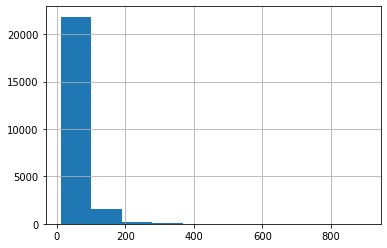

In [43]:
data['total_area'].hist()

График нам показывает, что явно есть выбивающиеся значения. Но их мало. Приблизим график

<AxesSubplot:>

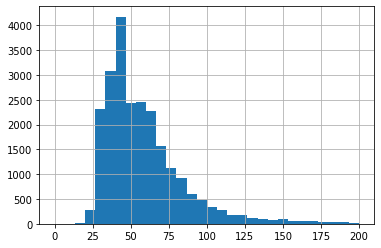

In [44]:
data['total_area'].hist(range=(0, 200), bins=30)

Распеределение значений нельзя назвать нормальным. График смещен влево. По графику можно сказать, что больше всего значений лежит в диапазоне примерно от 35 до 60

Посмотрим на основные статистические значения столбца

In [45]:
data['total_area'].describe()

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

Вывод был близок к реальному. Основная часть значений лежит в диапазоне от 40 до 69 квадратных метров. В принципе выглядит логично. Но также имеются значения больше 500. Было бы интересно посмотреть на характеристики этих квартир

In [46]:
data[data['total_area'] >= 500].sort_values(by='total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,filtered_locality_name,square_meter_price,week_day_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_kilometers
5883,3,230000000.0,500.0,2017-05-31,6,2.65,7.0,280.00,7,False,False,False,40.0,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,50.0,Санкт-Петербург,460000.00,2,5,2017,Последний,5.0
14991,8,150000000.0,500.0,2016-01-13,4,3.20,7.0,280.00,7,False,False,False,85.0,0,Санкт-Петербург,33058.0,6150.0,3,209.0,3,531.0,303.0,Санкт-Петербург,300000.00,2,1,2016,Последний,6.0
8004,20,84000000.0,507.0,2015-12-17,5,4.45,7.0,301.50,7,True,False,False,45.5,1,Санкт-Петербург,NaN,5735.0,2,110.0,0,NaN,1078.0,Санкт-Петербург,165680.47,3,12,2015,Последний,6.0
4230,1,50000000.0,517.0,2017-10-14,7,2.65,4.0,332.00,3,False,False,False,22.0,0,Санкт-Петербург,22835.0,1847.0,2,477.0,2,540.0,NaN,Санкт-Петербург,96711.80,5,10,2017,Другой,2.0
5349,20,65000000.0,590.0,2019-02-14,15,3.50,6.0,409.00,3,False,False,False,100.0,0,Санкт-Петербург,24447.0,4666.0,1,767.0,0,NaN,14.0,Санкт-Петербург,110169.49,3,2,2019,Другой,5.0
15626,20,300000000.0,618.0,2017-12-18,7,3.40,7.0,258.00,5,False,False,False,70.0,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,111.0,Санкт-Петербург,485436.89,0,12,2017,Другой,5.0
3113,19,140000000.0,631.0,2019-03-30,7,2.65,5.0,353.36,5,False,False,False,60.0,0,Санкт-Петербург,25707.0,4972.0,0,NaN,2,210.0,NaN,Санкт-Петербург,221870.05,5,3,2019,Последний,5.0
12840,20,140000000.0,631.2,2019-04-09,7,3.90,4.0,322.30,4,False,False,False,19.5,1,Санкт-Петербург,25707.0,4972.0,0,NaN,2,210.0,NaN,Санкт-Петербург,221799.75,1,4,2019,Последний,5.0
19505,8,420000000.0,900.0,2017-12-06,12,2.80,25.0,409.70,25,False,False,False,112.0,0,Санкт-Петербург,30706.0,7877.0,0,NaN,2,318.0,106.0,Санкт-Петербург,466666.67,2,12,2017,Последний,8.0


Значения вполне реальные. Удалять их из датафреймя не будем, так как назвать их "некорректными" нельзя. Скорее всего здесь очень элитные пентхаусы

Маленькие квартиры не выглядят подозрительно

<b>Вывод:</b> В столбце `total_area` никакие значения менять не станем, так как все значения на своих местах

#### Жилая площадь

Посмотрим гистограмму столбца `living_area`

<AxesSubplot:>

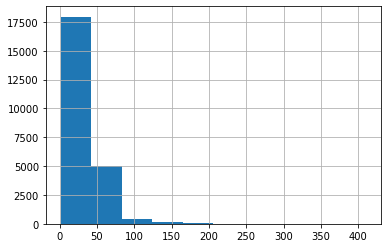

In [47]:
data['living_area'].hist()

Посмотрим поближе на основную массу значений

<AxesSubplot:>

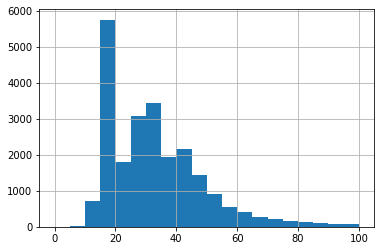

In [48]:
data['living_area'].hist(range=(0, 100), bins=20)

График выглядит ожидаемо. Он также смещен влево, как и вся площадь

<b>Вывод:</b> В столбце `living_area` никакие значения менять не станем, так как все значения на своих местах

#### Площадь кухни

Посмотрим гистограмму столбца `kitchen_area`

<AxesSubplot:>

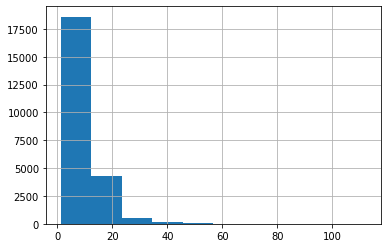

In [49]:
data['kitchen_area'].hist()

Посмотрим поближе на основную массу значений

<AxesSubplot:>

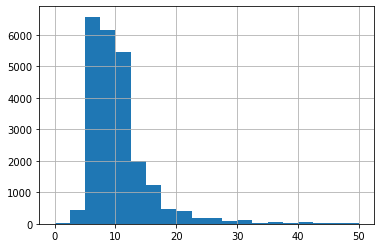

In [50]:
data['kitchen_area'].hist(range=(0,50), bins=20)

<b>Вывод:</b> График выглядит ожидаемо. Он также смещен влево, как и вся площадь, и жилая площадь

#### Цена объекта

<AxesSubplot:>

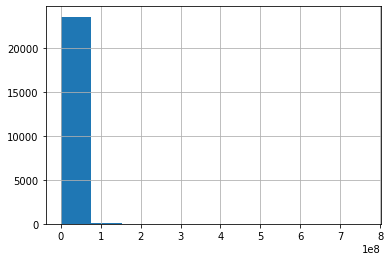

In [51]:
data['last_price'].hist()

Основная масса значений лежит в диапазоне до 1e8 означает 1*10^8 или 100,000,000. Есть и выбивающиеся значения. Например около 800,000,000. Посмотрим на эти значения

In [52]:
data[data['last_price'] >= 200000000].sort_values(by='last_price')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,filtered_locality_name,square_meter_price,week_day_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_kilometers
5883,3,230000000.0,500.0,2017-05-31,6,2.65,7.0,280.0,7,False,False,False,40.0,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,50.0,Санкт-Петербург,460000.00,2,5,2017,Последний,5.0
13726,7,240000000.0,410.0,2017-04-01,6,3.40,7.0,218.0,7,False,False,False,40.0,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,199.0,Санкт-Петербург,585365.85,5,4,2017,Последний,5.0
16434,17,245000000.0,285.7,2017-04-10,6,3.35,7.0,182.8,4,False,False,False,29.8,0,Санкт-Петербург,33143.0,6235.0,3,400.0,3,140.0,249.0,Санкт-Петербург,857542.88,0,4,2017,Другой,6.0
22784,18,289238400.0,187.5,2019-03-19,2,3.37,6.0,63.7,6,False,False,False,30.2,0,Санкт-Петербург,22494.0,1073.0,3,386.0,3,188.0,NaN,Санкт-Петербург,1542604.80,1,3,2019,Последний,1.0
15626,20,300000000.0,618.0,2017-12-18,7,3.40,7.0,258.0,5,False,False,False,70.0,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,111.0,Санкт-Петербург,485436.89,0,12,2017,Другой,5.0
1435,19,330000000.0,190.0,2018-04-04,3,3.50,7.0,95.0,5,False,False,False,40.0,0,Санкт-Петербург,23011.0,1197.0,3,519.0,3,285.0,233.0,Санкт-Петербург,1736842.11,2,4,2018,Другой,1.0
14681,15,401300000.0,401.0,2016-02-20,5,2.65,9.0,204.0,9,False,False,False,24.0,3,Санкт-Петербург,21912.0,2389.0,1,545.0,1,478.0,393.0,Санкт-Петербург,1000748.13,5,2,2016,Последний,2.0
19505,8,420000000.0,900.0,2017-12-06,12,2.80,25.0,409.7,25,False,False,False,112.0,0,Санкт-Петербург,30706.0,7877.0,0,NaN,2,318.0,106.0,Санкт-Петербург,466666.67,2,12,2017,Последний,8.0
12950,19,763000000.0,400.0,2017-09-30,7,2.65,10.0,250.0,10,False,False,False,68.0,2,Санкт-Петербург,25108.0,3956.0,1,530.0,3,756.0,33.0,Санкт-Петербург,1907500.00,5,9,2017,Последний,4.0


С одной стороны может показаться, что такие суммы это опечатка и по хорошему бы их исправить. Но если зайти на Яндекс.Недвижимость и осортировать продающиеся квартиры по убыванию цены, можно увидеть большое кол-во предложений около 500,000,000. Да, в датафрейме таких предложений не много, но они есть и также несут информацию, которую стоит учитывать. Поэтому и квартира ценой в 763,000,000 уже не кажется такой нереальной

Посмотрим поближе на основную массу значений

<AxesSubplot:>

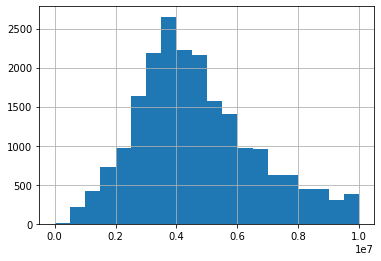

In [53]:
data['last_price'].hist(range=(0, 10000000), bins=20)

Распеределение близкое к нормальному. Хотя и чуть смещено влево. Посмотрим на основные статистические значения столбца

In [54]:
data['last_price'].describe()

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Есть квартира стоимостью в 12,000. Посмотрим, может есть еще аномально маленькие значения

In [55]:
data[data['last_price'] <= 400000].sort_values(by='last_price')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,filtered_locality_name,square_meter_price,week_day_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_kilometers
8778,7,12190.0,109.0,2019-03-20,2,2.75,25.0,32.0,25,False,False,False,40.5,0,Санкт-Петербург,36421.0,9176.0,1,805.0,0,NaN,8.0,Санкт-Петербург,111.83,2,3,2019,Последний,9.0


Только одна квартира с таким значением. К тому же глядя, например, на столбец `total_area` можно точно сказать, что здесь опечатка в цене. Посмотрим, какое медианное значение в Санкт-Петербурге по квартирам с примерно такой площадью

In [56]:
data.query('(100 <= total_area <= 110) & (filtered_locality_name == "Санкт-Петербург")')['last_price'].median()

12600000.0

И так, медианное значение для подобных квартир в Питере около 12,6 млн. Теория с опечаткой нам подходит. Значение в этом столбце должно быть 12,190,000. Как раз близкое к медианному. Заменим его

Напишем функцию, для изменения

In [57]:
def new_price_spb(row):
    local = row['locality_name']
    last_price = row['last_price']
    total_area = row['total_area']
    if (local == 'Санкт-Петербург') and (last_price < 100000) and (total_area <= 110 and total_area >= 100):
        return last_price * 1000
    else:
        return last_price

In [58]:
data['last_price'] = data.apply(new_price_spb, axis=1)

In [59]:
len(data[data['last_price'] <= 100000].sort_values(by='last_price'))

0

<b>Вывод:</b> Теперь все корректно. Выбивающиеся значения в столбце исправлены. Исправлена опечатка в самой "дешевой" квартире. Можно двигаться дальше

In [60]:
data['last_price'].min()

430000.0

#### Количество комнат

Посмотрим на гистограмму столбца `rooms`

<AxesSubplot:>

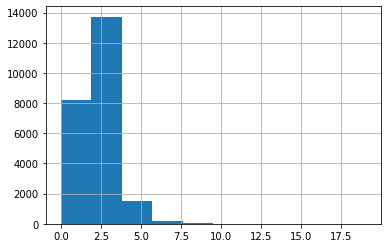

In [61]:
data['rooms'].hist()

Пока каких то сильно выбивающихся значений в большую сторону не наблюдаеся. 17 и более комнат вполне реально. Посмотрим поближе на основную массу

<AxesSubplot:>

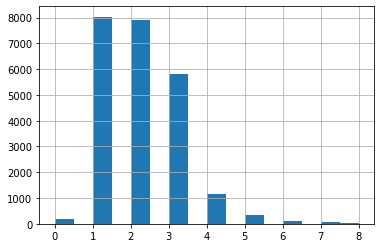

In [62]:
data['rooms'].hist(range=(0, 8), bins=16)

Основная масса это "однушки", "двушки" и "трешки". Но есть и значения, где 0 комнат. Что то странное. Посмотрим на эти квартиры

In [63]:
rooms_zero = data[data['rooms'] == 0]
rooms_zero

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,filtered_locality_name,square_meter_price,week_day_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_kilometers
144,1,2450000.0,27.00,2017-03-30,0,2.65,24.0,15.50,2,False,True,False,4.5900,2,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,181.0,Мурино,90740.74,3,3,2017,Другой,NaN
349,4,2320000.0,25.00,2017-09-27,0,2.65,14.0,17.00,1,False,False,True,4.2500,0,деревня Кудрово,NaN,NaN,0,NaN,0,NaN,45.0,Кудрово,92800.00,2,9,2017,Первый,NaN
440,8,2480000.0,27.11,2018-03-12,0,2.65,17.0,24.75,4,False,True,False,4.6087,2,Санкт-Петербург,38171.0,15015.0,0,NaN,2,982.0,64.0,Санкт-Петербург,91479.16,0,3,2018,Другой,15.0
508,0,3375000.0,34.40,2017-03-28,0,2.65,26.0,24.30,19,False,False,True,5.8480,1,посёлок Парголово,53115.0,19292.0,0,NaN,1,593.0,430.0,Парголово,98110.47,1,3,2017,Другой,19.0
608,2,1850000.0,25.00,2019-02-20,0,2.65,10.0,14.00,7,False,True,False,4.2500,0,посёлок Шушары,NaN,NaN,0,NaN,0,NaN,29.0,Шушары,74000.00,2,2,2019,Другой,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23162,7,3200000.0,26.00,2017-09-01,0,2.65,25.0,18.00,16,False,True,False,4.4200,0,Санкт-Петербург,11405.0,13222.0,0,NaN,1,623.0,14.0,Санкт-Петербург,123076.92,4,9,2017,Другой,13.0
23393,0,2500000.0,27.70,2017-09-28,0,2.65,24.0,18.00,4,False,False,True,4.7090,2,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,4.0,Мурино,90252.71,3,9,2017,Другой,NaN
23505,15,3350000.0,26.00,2018-09-07,0,2.65,19.0,14.56,8,False,True,False,4.4200,0,Санкт-Петербург,18090.0,17092.0,0,NaN,2,112.0,31.0,Санкт-Петербург,128846.15,4,9,2018,Другой,17.0
23543,10,1450000.0,29.00,2017-11-11,0,2.65,9.0,18.00,8,False,False,True,4.9300,2,Никольское,NaN,NaN,0,NaN,0,NaN,82.0,Никольское,50000.00,5,11,2017,Другой,NaN


На первый взгляд может показаться, что некоторые пользователи указывают количество комнат = 0, для открытых планировок или студий. Проверим теорию

In [64]:
rooms_st_op = data.query('(rooms == 0) and (studio == True or open_plan == True)')

# Убедимся, что индексы строк, где комнат 0 и где у этих же комнат studio или open_plan = True
if rooms_st_op.index.to_list() == rooms_zero.index.to_list():
    print(True)
else:
    print(False)

True


In [65]:
data.loc[data['rooms'] == 0, 'total_area'].mean()

29.279746192893406

Теория подтвердилась. В датафрейме, где количество комнат 0, значения характерны для студий и квартир с открым планом. Одна из воможных причин, почему пользователи указали именно такие значения: пользователи имели ввиду именно количество отдельных комнат. Также мы видим, что средний общий метраж квартир не превышает 30, что характерно для "однушек".<br>
Все таки 0 комнат быть не может, даже в студиях или открытых планироваках, комната хотя бы 1 точно есть. Поэтому заменим нулевые значения в столбце `rooms` на 1

In [66]:
data['rooms'] = data['rooms'].where(data['rooms'] != 0, 1)
len(data[data['rooms'] == 0])

0

Посмотрим на гистограмму еще раз

<AxesSubplot:>

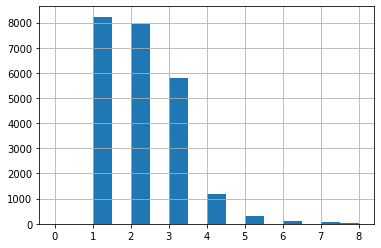

In [67]:
data['rooms'].hist(range=(0, 8), bins=16)

<b>Вывод:</b> Отлично, нулевых значений в столбце `rooms` не осталось. Гистограмма выглядит ожидаемо. Можно двигаться далее

#### Высота потолков

Посмотрим на гистограмму столбца `ceiling_height`

<AxesSubplot:>

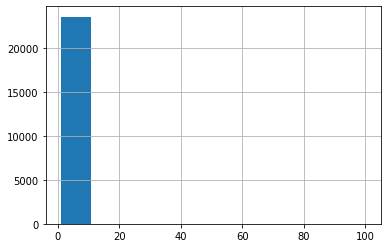

In [68]:
data['ceiling_height'].hist()

На гистограмме из первого пункта видим, что в столбце `ceiling_height` точно есть аномальные значения. Так как график заканчиваеться аж на 100. Посмотртрим на уникальные значения столбца

In [69]:
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

Объснить природу появления пропусков можно в значениях от 20 до 32. Так как скорее всего это ошибка в данных, и точка должна быть смещена влево на один знак. Например, 2.5, 3.2 и т.д.<br>
А вот объяснить потолки высотой в 1, 1.2, 1.75, 14, 100 уже сложно. (От 5 до 10 еще можно представить, например 2 или 3 этажные элитные квартиры)

In [70]:
# Обработаем сначала объсняемые значения
def new_ceiling(num):
    if num >= 20 and num <= 32:
        return num / 10
    else:
        return num
    
data['ceiling_height'] = data['ceiling_height'].apply(new_ceiling)

Строки с выбивающимися значениями лучше удалить

In [71]:
data = data[~data['ceiling_height'].isin([1, 1.2, 1.75, 14, 100])].reset_index(drop=True)

In [72]:
data['ceiling_height'].sort_values().unique()

array([ 2.  ,  2.2 ,  2.25,  2.26,  2.3 ,  2.34,  2.4 ,  2.45,  2.46,
        2.47,  2.48,  2.49,  2.5 ,  2.51,  2.52,  2.53,  2.54,  2.55,
        2.56,  2.57,  2.58,  2.59,  2.6 ,  2.61,  2.62,  2.63,  2.64,
        2.65,  2.66,  2.67,  2.68,  2.69,  2.7 ,  2.71,  2.72,  2.73,
        2.74,  2.75,  2.76,  2.77,  2.78,  2.79,  2.8 ,  2.81,  2.82,
        2.83,  2.84,  2.85,  2.86,  2.87,  2.88,  2.89,  2.9 ,  2.91,
        2.92,  2.93,  2.94,  2.95,  2.96,  2.97,  2.98,  2.99,  3.  ,
        3.01,  3.02,  3.03,  3.04,  3.05,  3.06,  3.07,  3.08,  3.09,
        3.1 ,  3.11,  3.12,  3.13,  3.14,  3.15,  3.16,  3.17,  3.18,
        3.2 ,  3.21,  3.22,  3.23,  3.24,  3.25,  3.26,  3.27,  3.28,
        3.29,  3.3 ,  3.31,  3.32,  3.33,  3.34,  3.35,  3.36,  3.37,
        3.38,  3.39,  3.4 ,  3.42,  3.43,  3.44,  3.45,  3.46,  3.47,
        3.48,  3.49,  3.5 ,  3.51,  3.52,  3.53,  3.54,  3.55,  3.56,
        3.57,  3.58,  3.59,  3.6 ,  3.62,  3.63,  3.65,  3.66,  3.67,
        3.68,  3.69,

Посмотрим на обновленную гистограмму

<AxesSubplot:>

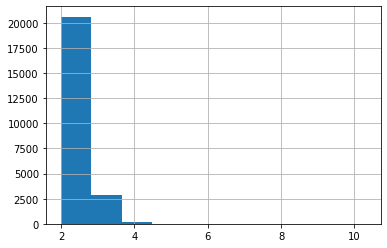

In [73]:
data['ceiling_height'].hist()

Теперь гистограмма заканчивается на 10. Это ожидаемо. Можем еще посмотреть на основную массу значений

<AxesSubplot:>

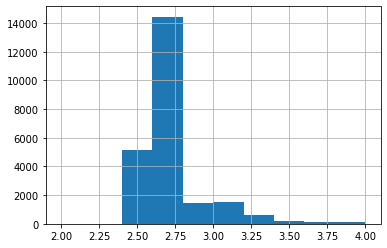

In [74]:
data['ceiling_height'].hist(range=(2, 4))

Вот так выглядит гистограмма основной массы значений. Вполне логично. Больше всего квартир с высотой потолков около 2.7 метра.

<b>Вывод:</b> В столбце `ceiling_height` выбивающиеся значения обработаны. Гистограммы выглядят ожидаемо

#### Тип этажа квартиры («первый», «последний», «другой»)

Посмотрим на гистограмму столбца `floor_type`

<AxesSubplot:>

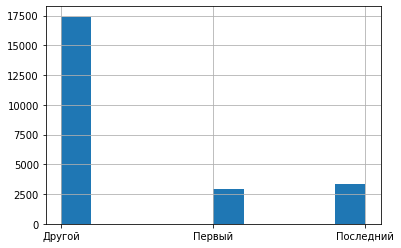

In [75]:
data['floor_type'].hist()

<b>Вывод:</b> Гистограмма выглядит вполне ожидаемо. Больше всего квартир находятся между первым и последним этажами. Также можно сказать, что квартир на первых этажах совсем немного меньше, чем на последнем. Плюс минус одинаково

#### Общее количество этажей в доме

Посмотрим на гистограмму столбца `floors_total`

<AxesSubplot:>

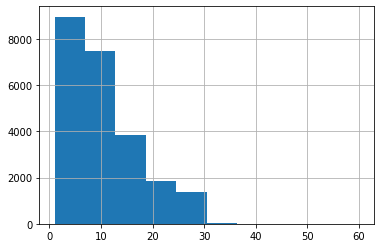

In [76]:
data['floors_total'].hist()

На первый взгляд гистограмма не выглядит необычно. Есть выбивающиеся значений с кол-вом этажей около 60. Но в Питере есть здание "Лахта Центр" высотой в 87 этажей. Так что максимальное значение в датафрейме, равное 60 не кажется аномальным.<br>
Посмотрим на основную массу значений

<AxesSubplot:>

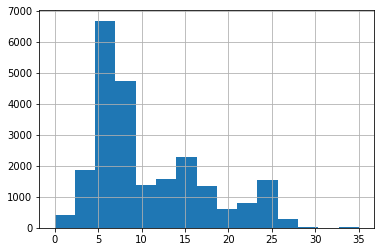

In [77]:
data['floors_total'].hist(range=(0, 35), bins=15)

Кажется, что на гистограмме имеются значения равные 0. Проверим

In [78]:
data['floors_total'].describe()

count    23560.000000
mean        10.675170
std          6.592906
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Нет, минимальное значение = 1. Все нормально

<b>Вывод:</b> В столбце `floors_total` аномальных и выбивающихся значений нет. Все значения в пределах разумного

#### Расстояние до центра города в метрах

Посмотрим на гистограмму столбца `cityCenters_nearest`

<AxesSubplot:>

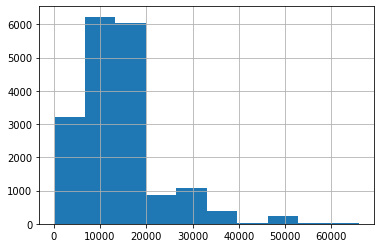

In [79]:
data['cityCenters_nearest'].hist()

Расстояние до центра более 20км выглядит подозрительно. Возможно это характерно для деревень и поселков. Проверим

In [80]:
data.pivot_table(
    index=['filtered_locality_name', 'locality_name'], 
    values='cityCenters_nearest', 
    aggfunc='median')

cityCenters_nearest
filtered_locality_name locality_name                               
Александровская        посёлок Александровская              27468.0
Белоостров             посёлок Белоостров                   38868.0
Зеленогорск            Зеленогорск                          53381.0
Колпино                Колпино                              32018.0
Красное Село           Красное Село                         29140.5
Кронштадт              Кронштадт                            49575.0
Левашово               посёлок Левашово                     25727.0
Лисий Нос              поселок Лисий Нос                    28246.0
                       посёлок Лисий Нос                    27297.0
Ломоносов              Ломоносов                            51677.0
Металлострой           посёлок Металлострой                 27602.0
Молодёжное             посёлок Молодёжное                   65764.0
Мурино                 поселок Мурино                       21888.0
Павловск               Павловск                             32683.0
Парголово              посёлок Парголово                    19311.0
Песочный               посёлок Песочный                     26099.5
Петергоф               Петергоф                             33771.0
Петро-Славянка         посёлок Петро-Славянка               27165.0
Понтонный              посёлок Понтонный                    32354.0
Пушкин                 Пушкин                               27930.5
Репино                 посёлок Репино                       42896.5
Санкт-Петербург        Санкт-Петербург                      12244.0
Сапёрный               посёлок Сапёрный                     35859.5
Сестрорецк             Сестрорецк                           34821.0
Стрельна               посёлок Стрельна                     23506.0
Усть-Ижора             посёлок Усть-Ижора                   28222.5
Шушары                 посёлок Шушары                       24212.0
Щеглово                посёлок Щеглово                      34085.0

Действительно, большинство больших значений удаленности от ценра характерно не для Санкт-Петербурга, а для близлежащих населенных пунктов.<br>
Глядя на сводную таблицу выше, закралась мысль о том, что значения столбца `cityCenters_nearest` характеризут расстояние до центра Санкт-Петербурга, а не просто до ближайшего центра. Проверил данную теорию, посмотрев на сервисе Яндекс.Карты растояние от большинства населенных пунктов в сводной таблице до центра Санкт-Петербруга и значения сошлись с табличными

<AxesSubplot:xlabel='filtered_locality_name'>

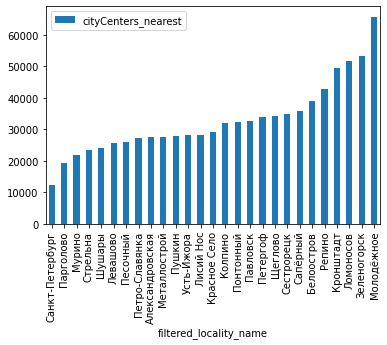

In [81]:
data.pivot_table(
    index='filtered_locality_name', 
    values='cityCenters_nearest', 
    aggfunc='median').sort_values(by='cityCenters_nearest').plot(kind='bar')

<b>Вывод:</b> На гистограмме выше можно увидеть распеределение удаленности населенных пунктов от центра Санкт-Петербурга. Ближе всего к центру Санкт-Петербурга находится Санкт-Петербург. Логично

#### Расстояние до ближайшего аэропорта

Посмотрим гистограмму столбца `airports_nearest`

<AxesSubplot:>

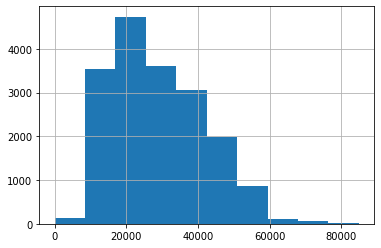

In [82]:
data['airports_nearest'].hist()

Наибольшее количество значений в районе 20км. Есть также нулевые значения. Посмотрим

In [83]:
data[data['airports_nearest'] == 0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,filtered_locality_name,square_meter_price,week_day_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_kilometers
21042,0,7000000.0,34.7,2018-09-23,1,2.7,9.0,19.8,3,False,False,False,6.0,2,Санкт-Петербург,0.0,22801.0,0,NaN,0,NaN,60.0,Санкт-Петербург,201729.11,6,9,2018,Другой,23.0


Значение определенно выбивающееся и объяснить его происхождение не получится. Есть смысл от него избавиться

In [84]:
data = data.drop(21042).reset_index(drop=True)

<b>Вывод:</b> Расстояние до аэропорта более 60км не кажется странным. Судя по данным столбца `cityCenters_nearest`, который характеризует расстояние до центра Санк-Петербурга и имеет значения более 60км, а аэропорт находится далеко не в центре, то подобные расстояния до аэропорта выглядят закономерно.

#### Расстояние до ближайшего парка

Посмотрим на гистограмму столбца `parks_nearest`

<AxesSubplot:>

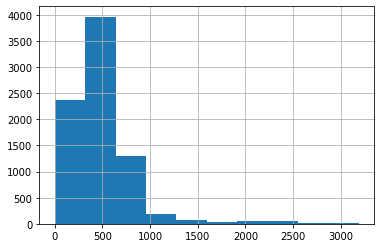

In [85]:
data['parks_nearest'].hist()

На шаге обработки пропусков мы пришли к выводу, что в столбце `parks_nearest` есть несколько значений, превышающих 3000. Эти значения выбиваются из общей логики, которая говорит о том, в столбце `parks_nearest` должны быть пропуски, если столбец `parks_around3000` имеет 0.<br>
Поэтому удалим эти выбивающиеся значения. 

In [86]:
data = data.drop(data[data['parks_nearest'] >= 3000].index).reset_index(drop=True)

И еще раз посмотрим на гистограмму для основной массы значений

<AxesSubplot:>

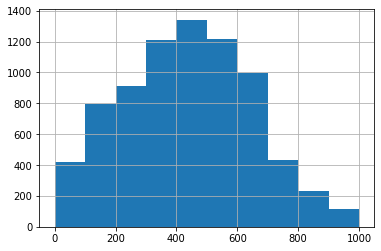

In [87]:
data['parks_nearest'].hist(range=(0, 1000))

<b>Вывод:</b> Выбивающиеся значения были уделены. Чаще всего встречаются значения около 500м

#### День и месяц публикации объявления

Посмотрим на гистограмме в какие дни недели и месяцы было больше и меньше всего оъявлений

<AxesSubplot:>

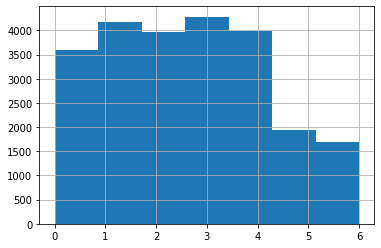

In [88]:
# Гистограмма для дней
data['week_day_exposition'].hist(bins=7)

Больше всего объявлений выкладывалось в будние дни. Основные пики Вторник и Четверг

<AxesSubplot:>

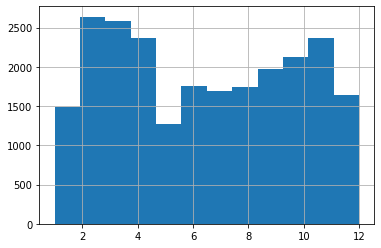

In [89]:
# Гистограмма для месяцев
data['month_exposition'].hist(bins=12)

<b>Вывод:</b> Больше всего объявляений выкладывалось в Февраль, Март, Апрель и Ноябрь. Меньше всего в Мае

#### Изучить, как быстро продавались квартиры (столбец days_exposition)

Для начала посмотрим на гистограмме, как долго висело каждое объявление

<AxesSubplot:>

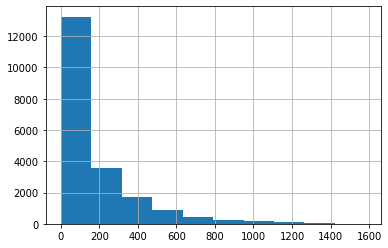

In [90]:
data['days_exposition'].hist()

На графике видно, что основаня часть объявлений была продана менее, чем за 200 дней. Посмотрим на основные статичтические значения столбца

In [91]:
data['days_exposition'].describe()

count    20460.000000
mean       180.783431
std        219.814394
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [92]:
print('Среднее:', data['days_exposition'].mean())
print('Медиана:', data['days_exposition'].median())

Среднее: 180.783431085044
Медиана: 95.0


<AxesSubplot:>

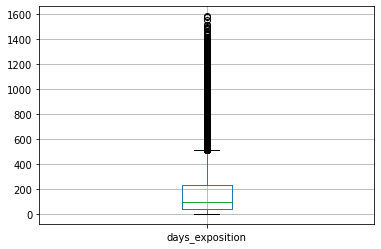

In [93]:
pd.DataFrame(data=data['days_exposition']).boxplot()

На графике "Ящик с усами" видно, что первый квантиль на значении 45, а третий 231. Считаются нормальными значения, входящие в 1.5 межквартильного размаха. На графике это верхний ус, то есть около 510. Нижний ус заканчивается на 1

Можно сказать, что все, что продалось быстрее 45 дней - быстрая продажа. Стандартная продажа от 45 до 231 дня. Долгая продажа - от 231 до 510. Все что дальше, это уже выбросы и аномально долгие продажи.<br>
Посмотрим на количество проданных квартир по быстроте продаж

In [94]:
sale_speed = pd.DataFrame(data=data['days_exposition'])
sale_speed = sale_speed.fillna('Не продана')
def sales_speed(days):
    if days == 'Не продана':
        return 'В процессе продажи'
    elif days < 45:
        return 'Быстрая продажа (До 45 дней)'
    elif days >= 45 and days <= 231:
        return 'Стандартная продажа (От 45 до 231 дня)'
    elif days > 231 and days <= 510:
        return 'Долгая продажа (От 231 до 510)'
    elif days > 510:
        return 'Аномально долгая продажа (От 510 дней)'

        
sale_speed['sale_type'] = sale_speed['days_exposition'].apply(sales_speed)
sale_speed.pivot_table(index='sale_type', values='days_exposition', aggfunc='count')

,days_exposition
sale_type,
Аномально долгая продажа (От 510 дней),1674
Быстрая продажа (До 45 дней),5084
В процессе продажи,3180
Долгая продажа (От 231 до 510),3435
Стандартная продажа (От 45 до 231 дня),10267


<b>Вывод:</b><br>
1. Больше всего продаж за стандартное время. От 45 до 231 дня
2. Меньше всего продаж за аномально долгое время. Более 510 дней
3. Быстрых продаж (до 45 дней) больше, чем долгих (от 231 до 510)
4. Еще не проданных на момент сбора данных квартир - 3180

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

##### Общая площадь

Постороим диаграмму рассеивания для столбцов `last_price` и `total_area`

Помним, что у нас есть аномальные значения в стоимости. Посмотрим

In [95]:
data['last_price'].describe()

count    2.364000e+04
mean     6.541509e+06
std      1.089830e+07
min      4.300000e+05
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Выбросы начинаются от стоимости в 10,000,000. Поэтому отфильтруем наш датафрейм включив в него только основную массу значений, без аномалий

In [96]:
100 / (len(data['last_price']) / len(data[data['last_price'] >= 10000000]))

11.730118443316414

Чтобы не превышать ограничение отброшенных данных в 10%, чуть чуть увеличим наш диапазон до 11,000,000

In [97]:
100 / (len(data['last_price']) / len(data[data['last_price'] >= 11000000]))

9.847715736040609

In [98]:
last_price_filtered = data[data['last_price'] <= 11000000]

In [99]:
# Код ревьюера

low_percentele = 0.01
hihg_percentele = 0.99

last_price_low = data['last_price'].quantile(low_percentele)
last_price_high = data['last_price'].quantile(hihg_percentele)

print(f'Нижняя граница last_price {last_price_low}')
print(f'Верхняя граница last_price {last_price_high}')

print(
    'Процент отброшенных значений = ',
    round(
        100 - len(data.query('@last_price_low <= last_price <= @last_price_high'))
        / len(data['last_price']) * 100,
        2
    ),
    '%'
)

Нижняя граница last_price 1000000.0
Верхняя граница last_price 36000000.0
Процент отброшенных значений =  1.95 %


<AxesSubplot:xlabel='last_price', ylabel='total_area'>

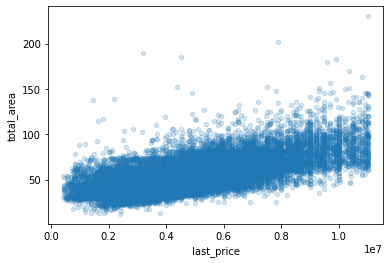

In [100]:
last_price_filtered.plot(kind='scatter', x='last_price', y='total_area', alpha=0.2)

Найдем коэффициент Пирсона

In [101]:
last_price_filtered['last_price'].corr(last_price_filtered['total_area'])

0.6854814237973497

Коэффициент Пирсона принимает среднее значение. Можно сказать, что от этого параметра "общая жилая площадь" цена зависит, но не сильно

##### Жилая площадь

Постороим диаграмму рассеивания для столбцов `last_price` и `living_area`

<AxesSubplot:xlabel='last_price', ylabel='living_area'>

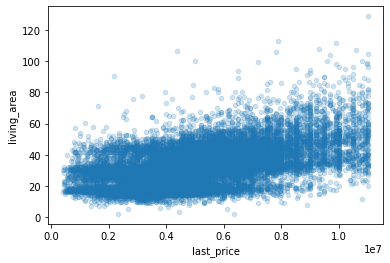

In [102]:
last_price_filtered.plot(kind='scatter', x='last_price', y='living_area', alpha=0.2)

In [103]:
last_price_filtered['last_price'].corr(last_price_filtered['living_area'])

0.5723971670552988

Аналогично "общая жилая площадь"

##### Площадь кухни

Постороим диаграмму рассеивания для столбцов `last_price` и `kitchen_area`

<AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>

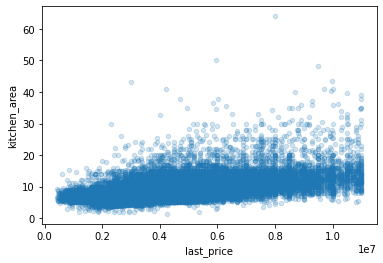

In [104]:
last_price_filtered.plot(kind='scatter', x='last_price', y='kitchen_area', alpha=0.2)

In [105]:
last_price_filtered['last_price'].corr(last_price_filtered['kitchen_area'])

0.4945606668537084

Зависимость от площади кухни еще меньше, чем от жилой и общей

##### Количество комнат

<AxesSubplot:xlabel='last_price', ylabel='rooms'>

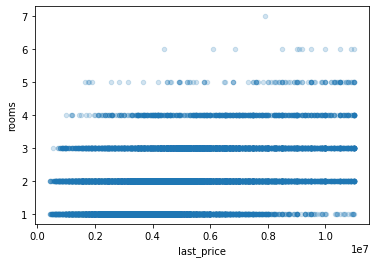

In [106]:
last_price_filtered.plot(kind='scatter', x='last_price', y='rooms', alpha=0.2)

In [107]:
last_price_filtered['last_price'].corr(last_price_filtered['rooms'])

0.4451298763291132

Можно сказать, что завсимость есть, но не сильная. Диаграмма рассеивания говорит о том, что квартиры разных ценовых категорий имеют, как 1, так и 3, 4 и 5 комнат

##### Этаж, на котором расположена квартира

Для этого параметра больше подойдет столбчатая диаграмма

<AxesSubplot:xlabel='floor_type'>

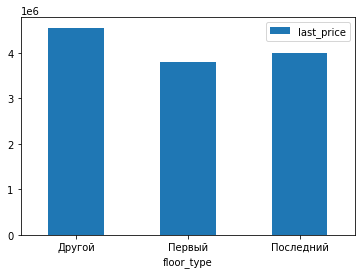

In [108]:
last_price_filtered.pivot_table(index='floor_type', values='last_price', aggfunc='median').plot(kind='bar', rot=0)

Глядя на нее, можно сказать, что тип этажа совсем не влияет на стоимость.

##### Дата размещения

Сначала посмотрим на зависимость от дня недели

<AxesSubplot:xlabel='week_day_exposition'>

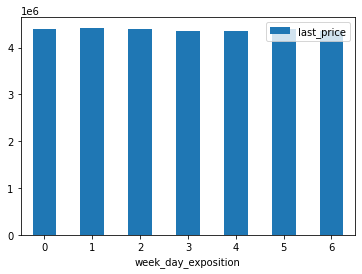

In [109]:
last_price_filtered.pivot_table(index='week_day_exposition', values='last_price', aggfunc='median').plot(kind='bar', rot=0)

Столбчатая диаграмма говорит о том, что зависимости цены от дня недели нет

Посмотрим на зависимость от месяца

<AxesSubplot:xlabel='month_exposition'>

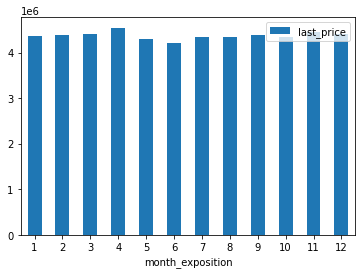

In [110]:
last_price_filtered.pivot_table(index='month_exposition', values='last_price', aggfunc='median').plot(kind='bar', rot=0)

С месяцами такая же ситуация, как и с днями недели

Посмотрим на зависимость от года

<AxesSubplot:xlabel='year_exposition'>

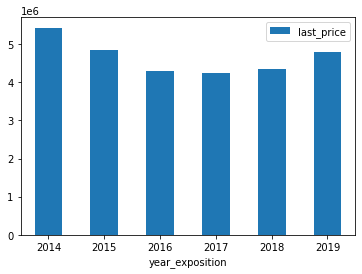

In [111]:
last_price_filtered.pivot_table(index='year_exposition', values='last_price', aggfunc='median').plot(kind='bar', rot=0)

На первый взгляд, можно было бы подумать, что от года цена должна увелииваться. Но графики говорят обратное. К 2019 года медианная стоимость даже немного уменшилась. А диаграмма рассеивания говорит о том, что в 2014 было продано меньше всего квартир

<AxesSubplot:xlabel='year_exposition'>

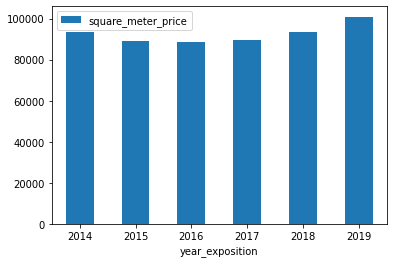

In [112]:
square_meter_price_year_pivot = last_price_filtered.pivot_table(
    index='year_exposition', values='square_meter_price', aggfunc='median')
square_meter_price_year_pivot.plot(kind='bar', rot=0)

In [113]:
square_meter_price_year_pivot

,square_meter_price
year_exposition,
2014,93517.110
2015,89344.195
2016,88842.980
2017,89772.730
2018,93518.705
2019,100917.430


Посмотрим на сколько процентов увеличилась цена за квадратный метр в 2019, по сравнению с 2016

In [114]:
100 - (100 / (
        square_meter_price_year_pivot['square_meter_price'].max() / 
        square_meter_price_year_pivot['square_meter_price'].min()))

11.964682414128063

А вот цена квадратного метра с годами увеличивается. Не намного, но все же. Также интересно, что в 2014 году цена за квадртаный метр практически такая же, как в 2018<br>
Цена за квадратный метр в 2019 по сравнению с 2016 выросла на 11.9%

<b>Вывод:</b><br>
Можно сказать, что из параметров (общей площади; жилой площади; площади кухни; количества комнат; этажа, на котором расположена квартира (первый, последний, другой); даты размещения):
1. Наибольшее влияние имеет параметр "общей площади". Но сам по себе он показывает не самое сильное влияние = 0.65. Можно сказать, что на стоиомость влияет больше параметров, чем одна "жилая площадь"
2. Дата размещения и тип этажа имеют практически нулевое влияение на цену. Хотя насчет года можно усомниться. Так как коэффициент может быть нулевой не потому, что связи между значениями нет, а из-за того, что у неё более сложный, не линейный характер
3. А вот цена квадратного метра с годами увеличивается. Не намного, но все же. Также интересно, что в 2014 году цена за квадртаный метр практически такая же, как в 2018
4. Цена за квадратный метр в 2019 по сравнению с 2016 выросла на 11.9%

#### Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра

Сначала найдем 10 населенных пунктов с наибольшим числом объявлений

In [115]:
largest_ad_local = data.groupby('filtered_locality_name')['studio'].count().sort_values(ascending=False).head(10)
largest_ad_local

filtered_locality_name
Санкт-Петербург    15712
Мурино               590
Кудрово              472
Шушары               440
Всеволожск           398
Пушкин               369
Колпино              338
Парголово            327
Гатчина              307
Выборг               237
Name: studio, dtype: int64

Теперь найдем среднюю цену по каждому населенному пункту

In [116]:
mean_square_meter_price_loc = data.query('filtered_locality_name.isin(@largest_ad_local.index)').groupby(
    'filtered_locality_name')['square_meter_price'].mean().sort_values(ascending=False)
mean_square_meter_price_loc

filtered_locality_name
Санкт-Петербург    114817.797555
Пушкин             103125.819377
Кудрово             95324.930508
Парголово           90175.913089
Мурино              86087.512017
Шушары              78677.364318
Колпино             75424.579112
Гатчина             68746.146515
Всеволожск          68654.473970
Выборг              58141.909325
Name: square_meter_price, dtype: float64

Построим сводную таблицу

In [117]:
largest_ad_local_pivot = pd.DataFrame(data=largest_ad_local).join(mean_square_meter_price_loc)
largest_ad_local_pivot

,studio,square_meter_price
filtered_locality_name,,
Санкт-Петербург,15712,114817.797555
Мурино,590,86087.512017
Кудрово,472,95324.930508
Шушары,440,78677.364318
Всеволожск,398,68654.473970
Пушкин,369,103125.819377
Колпино,338,75424.579112
Парголово,327,90175.913089
Гатчина,307,68746.146515


<AxesSubplot:xlabel='filtered_locality_name'>

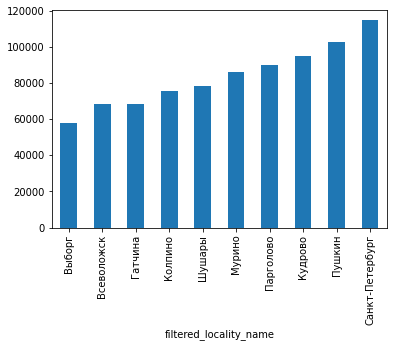

In [118]:
largest_ad_local_pivot['square_meter_price'].sort_values().plot(kind='bar')

<b>Вывод:</b><br>
1. Самый дорогой квадратный метр в Санкт-Петербурге - 114817.8 р/м.кв. Также в Питере больше всего объявлений - 15712
2. Самый дешевый квадратный метр в Выборге - 58141.9 р/м.кв. Также в Выборге меньше всего объявлений - 237

#### Выделить квартиры в Санкт-Петербурге и вычислить среднюю цену каждого километра. Описать, как стоимость объектов зависит от расстояния до центра города.

Сначала найдем среднюю цену километра в Санкт-Петербурге

In [119]:
data[data['filtered_locality_name'] == 'Санкт-Петербург']['cityCenters_nearest_kilometers'].isna().sum()

61

В выборке есть пропущенные значения значенния. Также есть значения равные 0, эти значения характризуют, что расстояние до центра менее 500м. Соответственнно при округлении до <b>ближайшего целого</b>, значения округлилсь до 0. При исследовании учитывать их не будем, так как на 0 делить нельзя

In [120]:
spb_centers_km = data[(data['filtered_locality_name'] == 'Санкт-Петербург') & 
                      ~(data['cityCenters_nearest_kilometers'].isna()) &
                     (data['cityCenters_nearest_kilometers'] != 0)]
spb_centers_km = spb_centers_km.loc[:, ['last_price', 'cityCenters_nearest_kilometers']]
spb_centers_km

,last_price,cityCenters_nearest_kilometers
0,13000000.0,16.0
2,5196000.0,14.0
3,64900000.0,7.0
4,10000000.0,8.0
7,7915000.0,12.0
...,...,...
23630,3550000.0,16.0
23631,5500000.0,6.0
23632,9470000.0,4.0
23635,9700000.0,4.0


Чтобы вычислить среднюю цену километра, сначала посчитаем цену километра для каждой квартиры, потом от этих чисел найдем среднее

In [121]:
def kilometer_price(row):
    price = row['last_price']
    km = row['cityCenters_nearest_kilometers']
    return round(price / km, 1)
spb_centers_km['kilometer_price'] = spb_centers_km.apply(kilometer_price, axis=1)
spb_centers_km.head()

,last_price,cityCenters_nearest_kilometers,kilometer_price
0,13000000.0,16.0,812500.0
2,5196000.0,14.0,371142.9
3,64900000.0,7.0,9271428.6
4,10000000.0,8.0,1250000.0
7,7915000.0,12.0,659583.3


In [122]:
print('Среднее:', spb_centers_km['kilometer_price'].mean())
print('Медиана:', spb_centers_km['kilometer_price'].median())

Среднее: 1371042.51593702
Медиана: 449083.35


Среднее больше медианы почта на миллион! В выборке однозначно есть аномальные значения, влияющие на среднее арифимитечское очень сильно. Поэтому в данном случае для среднего лучше использовать медиану

Было бы также интересно посмотреть, как для каждого километра меняется стоимость. Построим сводную таблицу

In [123]:
spb_centers_km.groupby('cityCenters_nearest_kilometers')['kilometer_price'].median()

cityCenters_nearest_kilometers
1.0     11395000.00
2.0      5000000.00
3.0      2803000.00
4.0      2300000.00
5.0      1900000.00
6.0      1483333.30
7.0      1114285.70
8.0       930625.00
9.0       588944.45
10.0      502500.00
11.0      461136.35
12.0      412500.00
13.0      400000.00
14.0      346428.60
15.0      326666.70
16.0      296875.00
17.0      269411.80
18.0      238888.90
19.0      236842.10
20.0      281250.00
21.0      251879.80
22.0      223863.65
23.0      193478.25
24.0      145000.00
25.0      151795.25
26.0      127692.30
27.0      307407.40
28.0      178214.30
29.0      156379.35
Name: kilometer_price, dtype: float64

<AxesSubplot:xlabel='cityCenters_nearest_kilometers'>

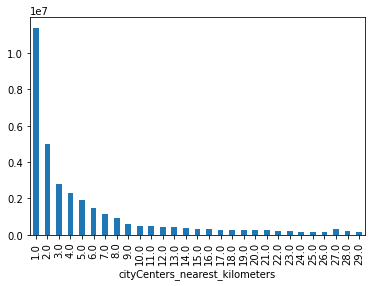

In [124]:
spb_centers_km.groupby('cityCenters_nearest_kilometers')['kilometer_price'].median().plot(kind='bar')

Теперь посчитаем среднюю стоимость объектов от км до центра города в Санкт-Петербурге

In [125]:
spb_centers_km.groupby('cityCenters_nearest_kilometers')['last_price'].median()

cityCenters_nearest_kilometers
1.0     11395000.0
2.0     10000000.0
3.0      8409000.0
4.0      9200000.0
5.0      9500000.0
6.0      8900000.0
7.0      7800000.0
8.0      7445000.0
9.0      5300500.0
10.0     5025000.0
11.0     5072500.0
12.0     4950000.0
13.0     5200000.0
14.0     4850000.0
15.0     4900000.0
16.0     4750000.0
17.0     4580000.0
18.0     4300000.0
19.0     4500000.0
20.0     5625000.0
21.0     5289476.0
22.0     4925000.0
23.0     4450000.0
24.0     3480000.0
25.0     3794881.0
26.0     3320000.0
27.0     8300000.0
28.0     4990000.0
29.0     4535000.0
Name: last_price, dtype: float64

<AxesSubplot:xlabel='cityCenters_nearest_kilometers'>

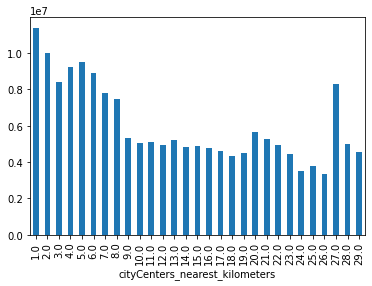

In [126]:
spb_centers_km.groupby('cityCenters_nearest_kilometers')['last_price'].median().plot(kind='bar')

Чем дальше от центра, тем средняя стоимость объектов снижается. Но интересено, что на 20 - 22 км и на 27 имеются резкие скачки в стоимости. Что может в свою очередь говорить, что на этом расстоянии располгаюатся более элитные ЖК

<b>Вывод:</b><br>
1. Медианная стоимость километра в Санкт-Петербурге = 448981.45 р/км. При этом арифмитическое среднее = 1370978.05 р/км. Это говорит о том, что в выборке есть аномальные значения
2. Совершенно ожидаемо, что при отдалении от центра цена за километр уменьшается. Выше всего цена за километр (11395000 р/км) у квартир, находящихся в непосредственной близосости (1км). Меньше всего (127692.3 р/км) при удаленности от центра на 26км
3. Также интересное наблюдение, что при удаленности от 24км до 29км стоимость примерно одинакова. 140000 - 170000 р/км. Но на расстояния в 27км стоимость заметно выше. Почти в 2 раза. И равна 307407.4 р/км. Можно предположить, что на этом расстоянии располагается более элитный ЖК
4. Средняя стоимость объектов тоже уменьшается при отдаленности от центра. Но интересено, что на 20 - 22 км и на 27 имеются резкие скачки в стоимости. Что может в свою очередь говорить, что на этом расстоянии располгаюатся более элитные ЖК

### Общий вывод

<b>1. Для корректного исследования в первую очередь были предобработаны данные:</b><br>
<br>
<i>Пропуски</i>
* В `is_apartment` (является ли квартира апартаментами) пропуски заменены на False (не является).<br>
* В `ponds_around3000` и `parks_around3000` (кол-во прудов и парков в радиусе 3км) пропуски заменены на 0 (прудов или парков нет в этом радиусе).<br>
* В `ponds_nearest` и `parks_nearest` (расстояние до ближайшего пруда/парка) пропуски оставлены, как есть (так как это будет значить, что ближайшего пруда/парка нет).<br>
* В `balcony` (кол-во балконов) пропуски заменены на 0 значения (в квартире балконов нет).<br>
* В `ceiling_height` (высота потолков) пропуски заменены на медианное значение потолков.<br>
* В `airports_nearest` и `cityCenters_nearest` (расстояние до ближайшего аэропорта/центра) пропуски оставлены, как есть (скорее всего это значит, что вблизи нет аэропорта/центра, либо до них слишком далеко).<br>
* В `days_exposition` (прошло дней с размещения до снятия объявления) пропуски оствлены, как есть (будем считать, что пропуски означают, что объявление еще не снято).<br>
* В `living_area` и `kitchen_area` (жилая площадь и площадь кухни) пропуски заменены на медианные значения в зависмости от размера всей площади квартиры.<br>
* В `floors_total` (кол-во этажей в здании) пропуски оставлены, как есть.<br>
* В `locality_name` (название населенного пункта) строки с пропусками удалены (так как это важная характеристика, а таких значений не много, было решено удалить их)
-------------------
<i>Дубликаты</i>
* Обработаны неявные дубликаты в названиях населенных пунктов
-------------------
<i>Аномальные значения</i>
* Обработаны аномально низкие значения в стоимости объектов
* Исправлены 0 значения в кол-ве комнат. 
* Обработаны аномальные значения в высоте потолков.

<div>
<b>2. Проведен исследовательский анализ данных:</b><br>
<br>
<i><b>Как быстро продавались квартиры?</b></i><br>
Ниже приведена таблица, в которой отражена скорость продажи, и количество объектов проданных за то или иное время
<br>
<table style="margin:10px auto 20px 0">
    <thead>
        <th>Быстрота продажи</th>
        <th>Кол-во объектов</th>
    </thead>
    <tbody>
        <tr>
            <td>Аномально долгая продажа (От 510 дней)</td>
            <td>1674</td>
        <tr>
        <tr>
            <td>Быстрая продажа (До 45 дней)</td>
            <td>5084</td>
        <tr>
        <tr>
            <td>Стандартная продажа (От 45 до 231 дня)</td>
            <td>10267</td>
        <tr>
        <tr>
            <td>Долгая продажа (От 231 до 510)</td>
            <td>3435</td>
        <tr>
        <tr>
            <td>В процессе продажи</td>
            <td>3180</td>
        <tr>
    </tbody>
</table>
  
<i><b>Какие факторы больше всего влияют на общую (полную) стоимость объекта?</b></i><br>
Для ответа на этот вопрос при анализе были отброшены аномальные значения, где стоимость объектов превышает 11,000,000 р. Так как эти значения являются выбросами и могут исказить результаты исследования.<br>
Ниже приведена таблица, где отражен коэффициент корреляции общей стоимость объекта от того или иного параметра. Чем больше значение приближено к 1 или -1, тем выше зависимость 
<table style="margin:10px auto 20px 0">
    <thead>
        <th>Параметр</th>
        <th>Корреляция</th>
    </thead>
    <tbody>
        <tr>
            <td>Общая площадь</td>
            <td>0.68</td>
        <tr>
        <tr>
            <td>Жилая площадь</td>
            <td>0.54</td>
        <tr>
        <tr>
            <td>Площадь кухни</td>
            <td>0.46</td>
        <tr>
        <tr>
            <td>Кол-во комнат</td>
            <td>0.44</td>
        <tr>
    </tbody>
</table>
    
- Наибольшее влияние имеет параметр "общей площади". Но сам по себе он показывает не самое сильное влияние = 0.68. Можно сказать, что на стоимость влияет больше параметров, чем одна "жилая площадь". У остальных параметров влияние еще меньше.<br>
    
Для категориальных данных коэффициенты не рассчитывались. По результатам исследования можно сказать, что:<br>
1. День, месяц подачи объявления и тип этажа никак не влияет на стоимость объекта. Потому что медианная стоимость объекта по каждой категории практически не меняется.<br>
2. А вот цена квадратного метра с годами увеличивается. Не намного, но все же. Также интересно, что в 2014 году цена за квадртаный метр практически такая же, как в 2018.<br>
3. Цена за квадратный метр в 2019 по сравнению с 2016 выросла на 11.9%

<i><b>Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений</b></i><br>
Ниже приведена таблица с количеством объявлений в городе и ценой за квадратный метр
<table style="margin:10px auto 20px 0">
    <thead>
        <th>Город</th>
        <th>Кол-во объявлений</th>
        <th>Цена за м2</th>
    </thead>
    <tbody>
        <tr>
            <td>Санкт-Петербург</td>
            <td>15712</td>
            <td>114817.79</td>
        <tr>
        <tr>
            <td>Пушкин</td>
            <td>369</td>
            <td>103125.81</td>
        <tr>
        <tr>
            <td>Кудрово</td>
            <td>472</td>
            <td>95324.93</td>
        <tr>
        <tr>
            <td>Парголово</td>
            <td>327</td>
            <td>90175.91</td>
        <tr>
        <tr>
            <td>Мурино</td>
            <td>590</td>
            <td>86087.51</td>
        <tr>
        <tr>
            <td>Шушары</td>
            <td>440</td>
            <td>78677.36</td>
        <tr>
        <tr>
            <td>Колпино</td>
            <td>338</td>
            <td>75424.57</td>
        <tr>
        <tr>
            <td>Гатчина</td>
            <td>307</td>
            <td>68746.14</td>
        <tr>
        <tr>
            <td>Всеволожск</td>
            <td>398</td>
            <td>68654.47</td>
        <tr>
        <tr>
            <td>Выборг</td>
            <td>237</td>
            <td>58141.90</td>
        <tr>
    </tbody>
</table>
    
- Самый дорогой квадратный метр в Санкт-Петербурге - 114817.8 р/м.кв. Также в Питере больше всего объявлений - 15712
    
- Самый дешевый квадратный метр в Выборге - 58141.9 р/м.кв. Также в Выборге меньше всего объявлений - 237

<i><b>Выделить квартиры в Санкт-Петербурге и вычислить среднюю цену каждого километра.</b></i><br>
Средняя цена километра: 1,371,042 р.<br>
Медианная цена километра: 449,083 р.<br>
    
Среднее больше медианы почти на миллион! В выборке однозначно есть аномальные значения, влияющие на среднее арифимитечское очень сильно. Поэтому в данном случае для среднего лучше использовать медиану<br>

Совершенно ожидаемо, что при отдалении от центра цена за километр уменьшается. Выше всего цена за километр (11,395,000 р/км) у квартир, находящихся в непосредственной близосости (1км). Меньше всего (127,692.3 р/км) при удаленности от центра на 26км<br>
    
Также интересное наблюдение, что при удаленности от 24км до 29км стоимость примерно одинакова. 140,000 - 170,000 р/км. Но на расстояния в 27км стоимость заметно выше. Почти в 2 раза. И равна 307,407.4 р/км. Можно предположить, что на этом расстоянии располагается более элитный ЖК

Средняя стоимость объектов тоже уменьшается при отдаленности от центра. Но интересено, что на 20 - 22 км и на 27 имеются резкие скачки в стоимости. Что может в свою очередь говорить, что на этом расстоянии располгаюатся более элитные ЖК
<div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод